In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Before we create a dataframe for the actual data, let us have a look at the features of the data and the description for each feature:

In [2]:
data_dict=pd.read_csv("Healthcare data dict.csv", index_col='Column')

In [3]:
data_dict

,Description
Column,
case_id,Case_ID registered in Hospital
Hospital_code,Unique code for the Hospital
Hospital_type_code,Unique code for the type of Hospital
City_Code_Hospital,City Code of the Hospital
Hospital_region_code,Region Code of the Hospital
Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
Department,Department overlooking the case
Ward_Type,Code for the Ward type
Ward_Facility_Code,Code for the Ward Facility


Now we can import the data in a dataframe 'df':

In [4]:
df=pd.read_csv("Healthcare data.csv")

Let us check the head of the dataframe:

In [5]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


The shape of our data:

In [6]:
df.shape

(318438, 18)

Our data has 318438 rows and 18 features. The next step is to identify which features are numeric and which featues are categorical

NUMERIC FEATURES:

In [7]:
df.select_dtypes(include=np.number)
df.select_dtypes(include=np.number).columns.tolist()

['case_id',
 'Hospital_code',
 'City_Code_Hospital',
 'Available Extra Rooms in Hospital',
 'Bed Grade',
 'patientid',
 'City_Code_Patient',
 'Visitors with Patient',
 'Admission_Deposit']

CATEGORICAL FEATURES:

In [8]:
string=['object']
df.select_dtypes(include=string)
df.select_dtypes(include=string).columns.tolist()

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age',
 'Stay']

Let us now find which featues have null values, if there are any:

In [9]:
df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

So, clearly 'Bed Grade' and 'City_Code_Patient' have null values. We will deal with them in feature engineering.

# CHECKING DISTRIBUTION AND COUNTS OF ALL COLUMNS

We will begin our exploratory data analysis by analysing the distribution of our features. We will begin with the categorical features, and will then proceed to the numerical ones. Since distribution plot for categorical features are not possible, we will create count plots for them instead.

**CATEGORICAL FEATURES**

1. Hospital_type_code

C:\Users\Faayez\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total number of cases')

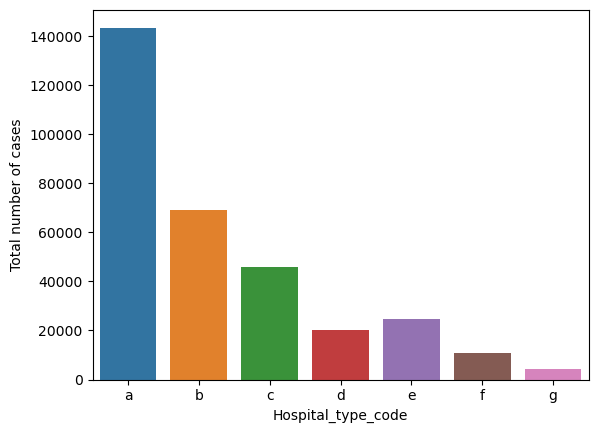

In [10]:
sns.countplot(df['Hospital_type_code'].sort_values())
plt.ylabel('Total number of cases')

The countplot says that the most number of cases were reported in Hospitals which had a type code of 'a'. On the other hand the least number of cases were reported in the hospitals with type code 'g'. The total number of cases continue to roughly decrease as we move from category 'a' to category 'g'.

2. Hospital_region_code

C:\Users\Faayez\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total number of cases')

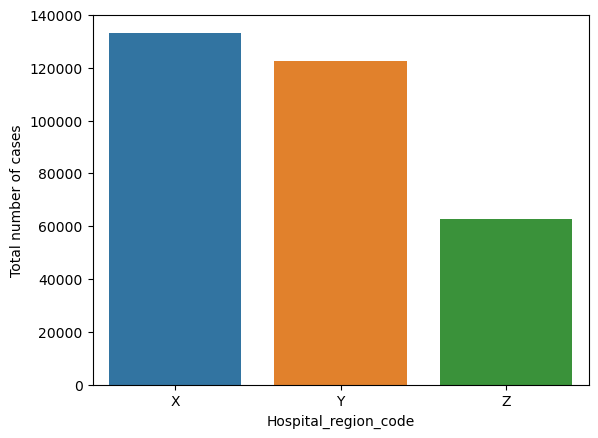

In [11]:
sns.countplot(df['Hospital_region_code'].sort_values())
plt.ylabel('Total number of cases')

The countplot says that the most number of cases were reported in region X, and the least number of cases were reported in region Z. 

3. Department

C:\Users\Faayez\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total number of cases')

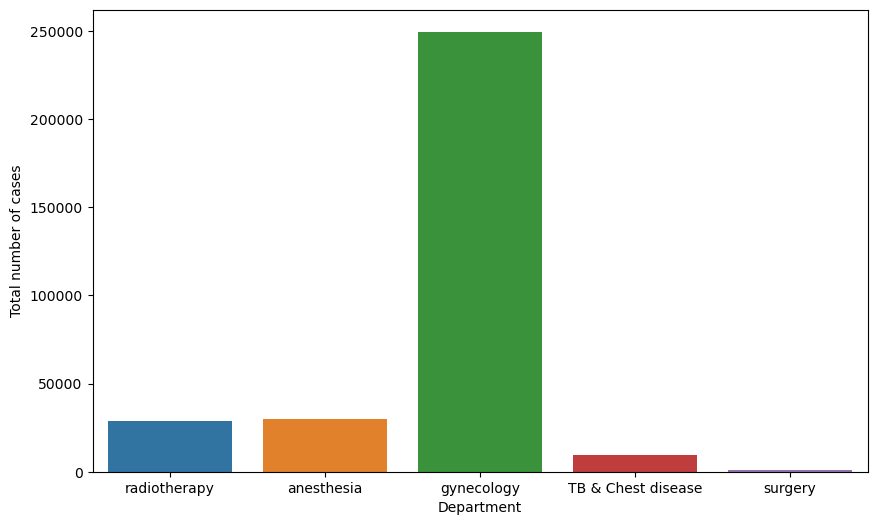

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot('Department', data=df)
plt.ylabel('Total number of cases')

The countplot says that if we sum up all the cases on the basis of the department that attended them, we will find that on an aggregate level the majority cases were attended by the gynecology department. On the other hand, on an aggregate level, the surgery department attended the least number of cases.

4. Ward_Type

C:\Users\Faayez\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total number of cases')

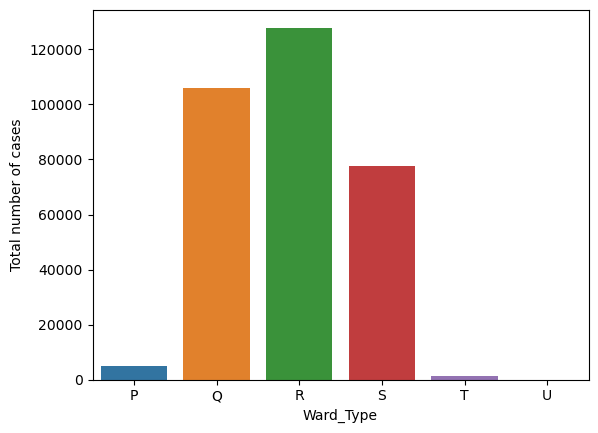

In [13]:
sns.countplot(df['Ward_Type'].sort_values())
plt.ylabel('Total number of cases')

The countplot says that if we sum up all the cases on the basis of the ward type that was alloted to them, we will find that in majority cases the ward type awarded was either Q, R or S. On the other hand, on an aggregate level, only a few cases were allotted ward type P, T or U.

5. Ward_Facility_Code

C:\Users\Faayez\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total number of cases')

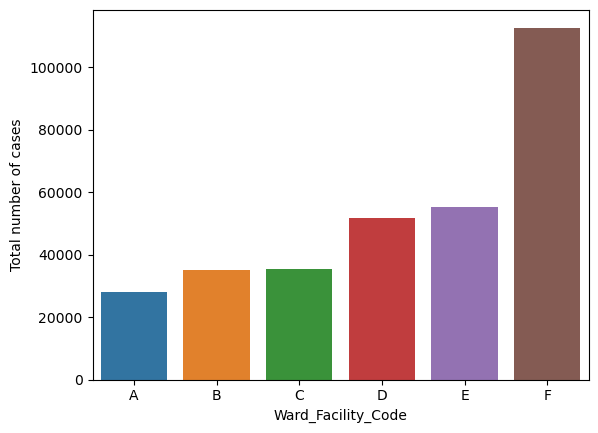

In [14]:
sns.countplot(df['Ward_Facility_Code'].sort_values())
plt.ylabel('Total number of cases')

The countplot says that if we sum up all the cases on the basis of their ward facility code, we will find that the ward facility code F was the most recurring. While ward facility code A was the least recurring. The occurrence of any type of ward facility code gradually increases as we move from ward facility code A to F.

6. Type of Admission

C:\Users\Faayez\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total number of cases')

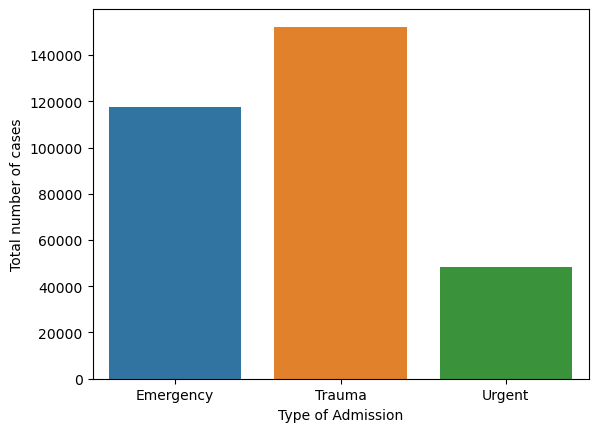

In [15]:
sns.countplot('Type of Admission', data=df)
plt.ylabel('Total number of cases')

The countplot says that among all the admissions made across all hospitals, most number of admissions were made under the admission type 'Trauma'. While least number of admissions were made under admission type 'Urgent'.

7. Severity of Illness

C:\Users\Faayez\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total number of cases')

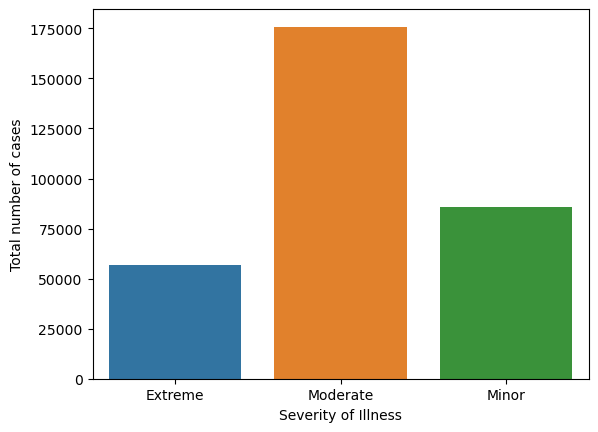

In [16]:
sns.countplot('Severity of Illness', data=df)
plt.ylabel('Total number of cases')

The countplot says that the severity of illness in most cases was 'Moderate'. Minor type of severity was found in lesser number of cases and Extrene severity was found in even lesser number of cases. 

8. Age

C:\Users\Faayez\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total number of cases')

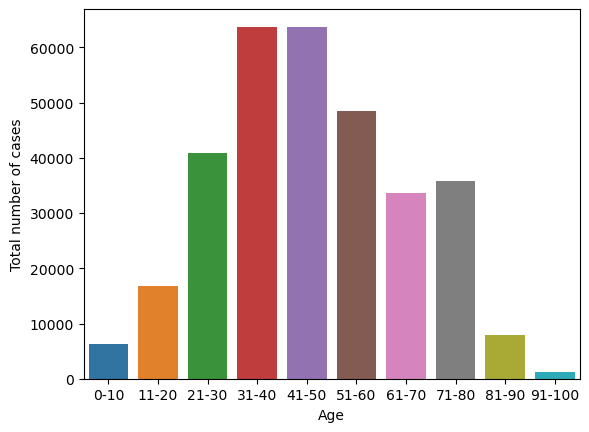

In [17]:
sns.countplot(df['Age'].sort_values())
plt.ylabel('Total number of cases')

The countplot says that the the majority cases were reported from age groups ranging from 21-30 to 71-80. Only a few cases were reported from the age groups above and below the stated age group range. We can also say that as the age rises, the total number of cases reported from that age increases until we reach the age group 41-50. Beyond this age group, the total number of cases reported start to decline.

9. Stay

C:\Users\Faayez\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total number of cases')

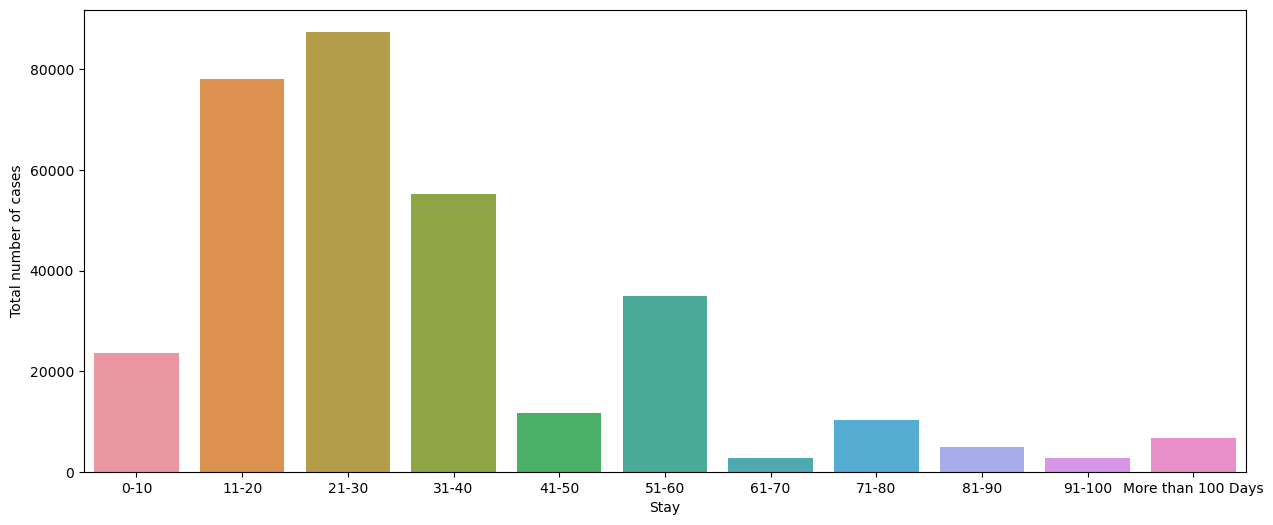

In [18]:
plt.figure(figsize=(15, 6))
sns.countplot(df['Stay'].sort_values())
plt.ylabel('Total number of cases')

The countplot says that majority of the patients stay at the hospital for days ranging from 11-20 to 31-40. The number of patients staying for more than this range continues to decline with a spike at 51-60 number of days. **NOTICE THAT 'STAY', WHICH IS OUR DEPENDENT CATEGORICAL VARIABLE IS VERY IMBALANCED. WE WILL DEAL WITH THIS IMBALANCE IN OUR FEATURE ENGINEERING AND SELECTION.**

**NUMERICAL FEATURES**

**NOTE**: We will skip on 'case_id' and 'patientid' features because they are unique identity columns. Apart from them we will also be skipping City_Code_Patient',  'City_Code_Hospital', and 'Hospital_code' because for these features a 'distrbution plot' would not make interpretable sense. Moreover if these features had been categorical or nominal, constructing countplots would have been possible but that is obviously not the case. During feature engineering, assigning dummies to so many numeric values would only complicate our model. Additionally, assigning dummies to such type of numeric data creates problems in running our machine learning algorithm because the algorithm cannot work on features the header of which are represented by integers. So we will simply skip them.  

1. Available Extra Rooms in Hospital 

C:\Users\Faayez\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Available Extra Rooms in Hospital', ylabel='count'>

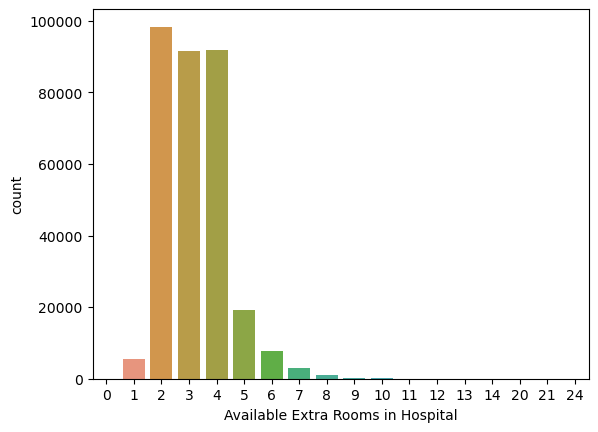

In [19]:
sns.countplot('Available Extra Rooms in Hospital', data=df)

The number of available rooms in any hospital when any random patient is admitted, is usually between 2 and 4. Available rooms greater than 5 is rarely observed. Clearly the distribution of the number of available rooms is positively skewed.

2. Admission_Deposit

C:\Users\Faayez\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Admission_Deposit', ylabel='Density'>

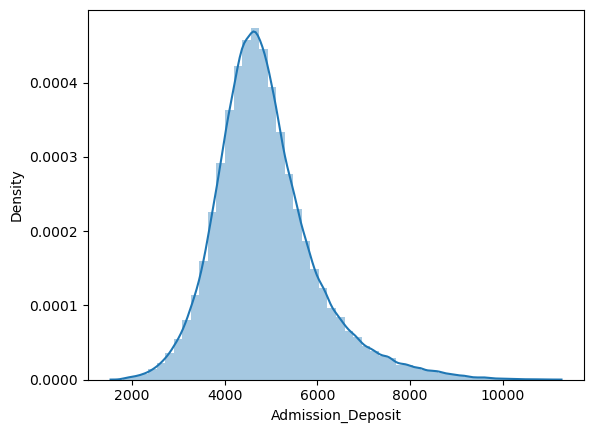

In [20]:
sns.distplot(df['Admission_Deposit'])

The admission deposit has a roughly symmetric distribution, with the distribution centred around 3000 to 6000. The distribution has somewhat a positive skew and some outliers.

3. Visitors with Patient

C:\Users\Faayez\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Visitors with Patient', ylabel='Density'>

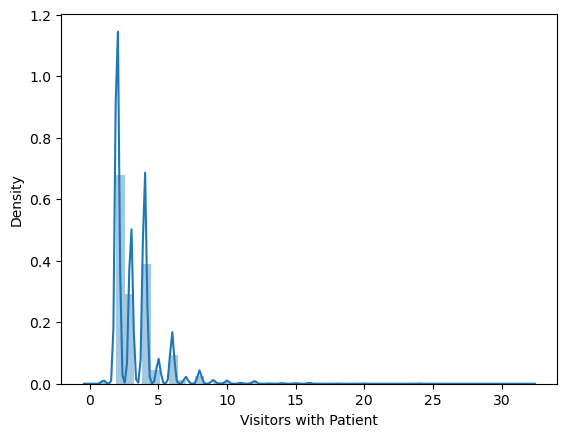

In [21]:
sns.distplot(df['Visitors with Patient'])

The distribution is severely skewed to the right with many outliers. If this feature does become a part of our model, its skewness will have to be  dealt with.

4. Bed Grade

C:\Users\Faayez\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total number of cases')

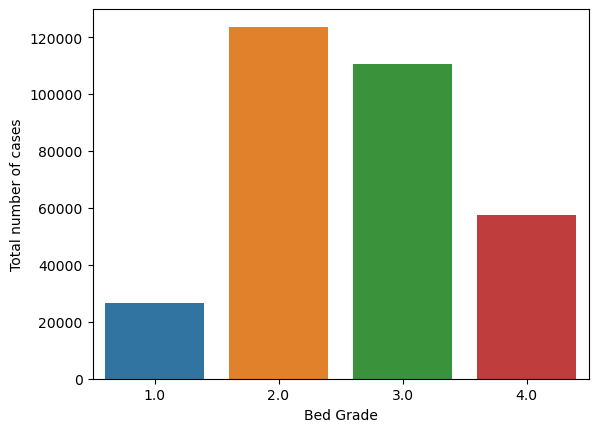

In [22]:
sns.countplot('Bed Grade', data=df)
plt.ylabel('Total number of cases')

Most of the patients are allotted beds with a grade of either 2 or 3. The number of patients who are alloted a bed with bed grade of 1 or 4 are very few.

# RELATIONSHIP BETWEEN INDEPENDENT FEATURES AND THE DEPENDENT FEATURE

We will start off by finding the relationship between the categorical features and the dependent features. Since both of them are categorical, we will have to construct contingency tables and make bar plots therefrom.

1. Hospital_type_code V/s Stay

In [23]:
stayVShtype=pd.pivot_table(df[['Hospital_type_code', 'Stay']], index='Hospital_type_code', columns='Stay', aggfunc=len).transpose()
stayVShtype

Hospital_type_code,a,b,c,d,e,f,g
Stay,,,,,,,
0-10,10559,5145,3588,1314,1805,1023,170
11-20,39807,13933,10318,4423,6644,2332,682
21-30,40286,19541,12526,5527,6524,1897,1190
31-40,23974,12385,8222,3706,4060,2093,719
41-50,4111,3893,1872,760,764,204,139
51-60,14617,6909,5176,2713,2832,1960,811
61-70,924,917,430,186,197,44,46
71-80,3722,2608,1611,761,824,482,246
81-90,1890,1026,725,421,395,254,127


<AxesSubplot:xlabel='Stay'>

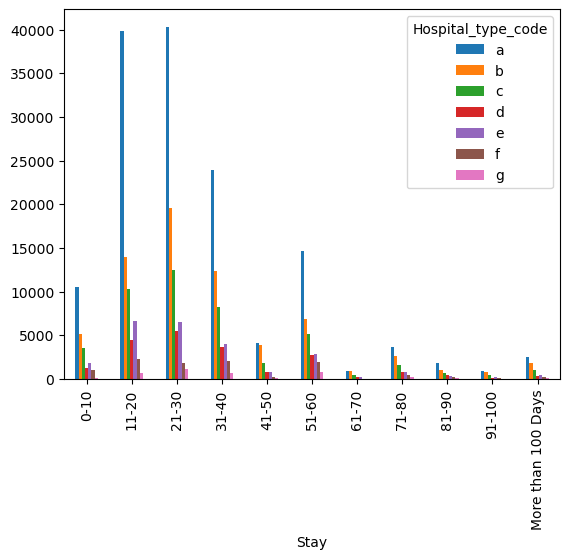

In [24]:
stayVShtype.plot(kind='bar')

For any duration of stay, majortiy of the patients choose to stay at a hospital with type code a. The hospital type code which is the least preferred among patients is type code g.  

2. Hospital_region_code V/s Stay

In [25]:
stayVShrcode=pd.pivot_table(df[['Hospital_region_code', 'Stay']], index='Hospital_region_code', columns='Stay', aggfunc=len).transpose()
stayVShrcode

Hospital_region_code,X,Y,Z
Stay,,,
0-10,8145,10447,5012
11-20,33885,29786,14468
21-30,38768,31595,17128
31-40,22830,21314,11015
41-50,4405,5036,2302
51-60,14723,13023,7272
61-70,1012,1184,548
71-80,4091,4069,2094
81-90,1910,1940,988


<AxesSubplot:xlabel='Stay'>

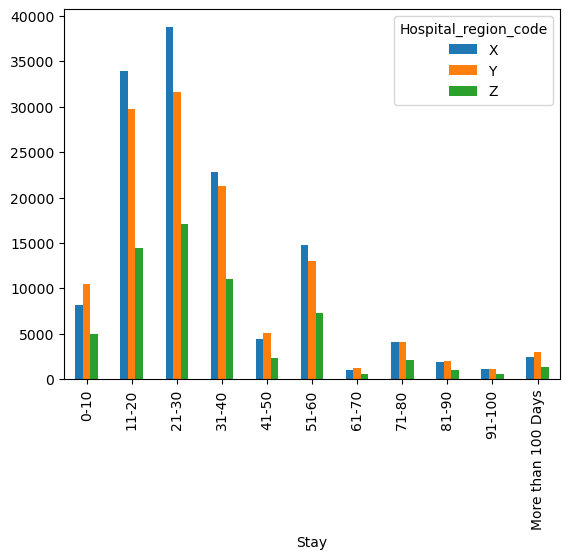

In [26]:
stayVShrcode.plot(kind='bar')

For any duration of stay, most of the patients tend to stay at a hospital which is situated in region X or Y. For certain duration of days, region X is preferred to Y and vice versa. The least preferred hospital region is region Z. Moreover, the number of cases for each duration rises until stay duration of 21-30 days, beyond which the number of cases start to taper off. 

3. Department V/s Stay

In [27]:
stayVSDepartment=pd.pivot_table(df[['Department', 'Stay']], index='Department', columns='Stay', aggfunc=len).transpose()
stayVSDepartment

Department,TB & Chest disease,anesthesia,gynecology,radiotherapy,surgery
Stay,,,,,
0-10,791,1519,18849,2379,66
11-20,2379,8823,59690,6988,259
21-30,2618,8950,68383,7263,277
31-40,1753,4958,43535,4713,200
41-50,300,851,9671,879,42
51-60,1047,2527,27989,3256,199
61-70,76,173,2226,264,5
71-80,294,703,8165,1043,49
81-90,140,384,3748,528,38


<AxesSubplot:xlabel='Stay'>

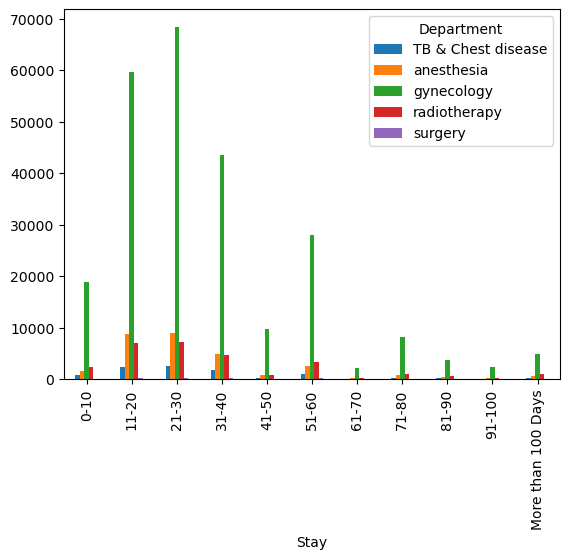

In [28]:
stayVSDepartment.plot(kind='bar')

It is quite evident that for any duration of stay, the most number of cases for that duration of stay are attended by the gynecology department followed by either the radiotherapy or the anesthesia department.

4. Ward_Type V/s Stay

In [29]:
stayVSwtype=pd.pivot_table(df[['Ward_Type', 'Stay']], index='Ward_Type', columns='Stay', aggfunc=len).transpose()
stayVSwtype

Ward_Type,P,Q,R,S,T,U
Stay,,,,,,
0-10,461.0,8315.0,9310.0,5407.0,110.0,1.0
11-20,1393.0,29204.0,31621.0,15649.0,269.0,3.0
21-30,1802.0,34736.0,36698.0,13862.0,390.0,3.0
31-40,745.0,17177.0,22047.0,14897.0,291.0,2.0
41-50,285.0,4946.0,4269.0,2174.0,69.0,NaN
51-60,186.0,6507.0,13733.0,14402.0,190.0,NaN
61-70,73.0,986.0,1045.0,627.0,13.0,NaN
71-80,53.0,1953.0,4006.0,4186.0,56.0,NaN
81-90,14.0,792.0,1692.0,2301.0,39.0,NaN


<AxesSubplot:xlabel='Stay'>

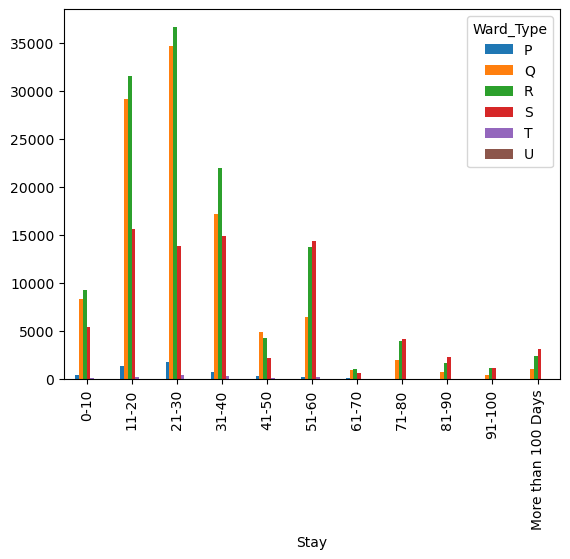

In [30]:
stayVSwtype.plot(kind='bar')

For any duration of stay, most of the cases are allotted ward type R. But this holds strictly true only until stay duration of 31-40 days beyond which the patients are allotted ward type S more often. As usual the number of cases for any duration of stay often taper off as we increase the duration.

5. Ward_Facility_Code V/s Stay

In [31]:
stayVSwfc=pd.pivot_table(df[['Ward_Facility_Code', 'Stay']], index='Ward_Facility_Code', columns='Stay', aggfunc=len).transpose()
stayVSwfc

Ward_Facility_Code,A,B,C,D,E,F
Stay,,,,,,
0-10,2382,2607,3921,3919,3486,7289
11-20,6135,7874,12068,9844,15081,27137
21-30,7476,8629,7867,15099,16357,32063
31-40,5003,6421,5591,9302,9215,19627
41-50,1198,1090,595,3351,1704,3805
51-60,3155,5059,3225,4739,5608,13232
61-70,255,250,138,796,411,894
71-80,967,1381,721,1967,1511,3707
81-90,408,768,400,772,735,1755


<AxesSubplot:xlabel='Stay'>

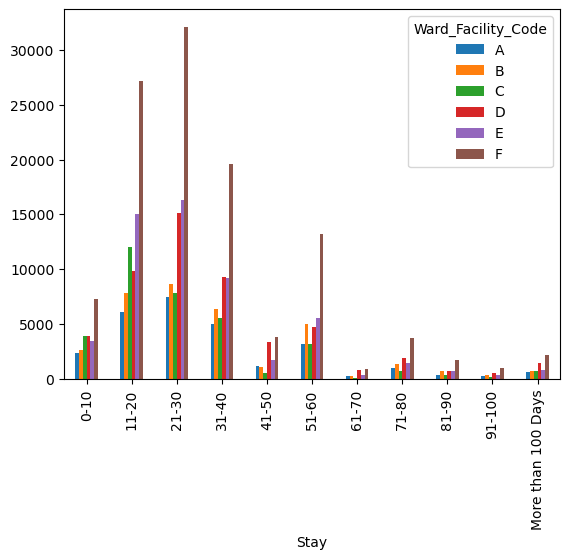

In [32]:
stayVSwfc.plot(kind='bar')

The results of the univariate analysis hold true here as well. For any duration of stay, the ward facility code is code F for most number of cases and this pattern holds strictly true even as we increase the duration of the stay.

6. Type of Admission V/s Stay

In [33]:
stayVSAdmission=pd.pivot_table(df[['Type of Admission', 'Stay']], index='Type of Admission', columns='Stay', aggfunc=len).transpose()
stayVSAdmission

Type of Admission,Emergency,Trauma,Urgent
Stay,,,
0-10,14218,5328,4058
11-20,31559,33745,12835
21-30,27399,46244,13848
31-40,18921,28107,8131
41-50,4145,5968,1630
51-60,11885,18310,4823
61-70,976,1479,289
71-80,3375,5551,1328
81-90,1708,2548,582


<AxesSubplot:xlabel='Stay'>

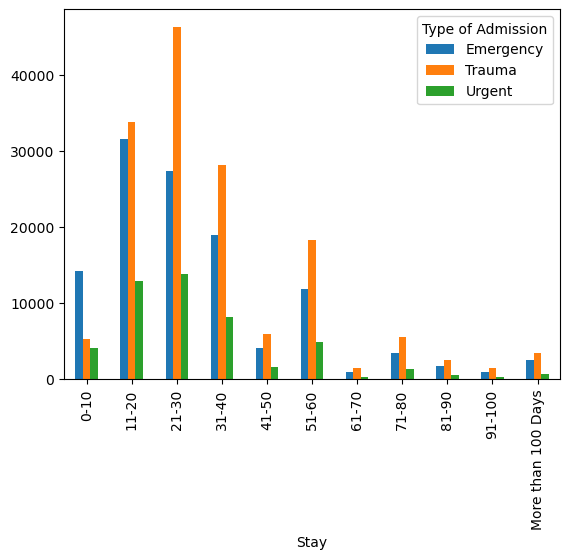

In [34]:
stayVSAdmission.plot(kind='bar')

Apart form the stay of 0-10 days, the admission type 'Trauma' strictly dominates the other two categories. The dominance strictly increases up until 21-30 days, beyond which the dominance starts to soften out and the difference across the admission types becomes minimal.

7. Severity of Illness V/s Stay

In [35]:
stayVSseverity=pd.pivot_table(df[['Severity of Illness', 'Stay']], index='Severity of Illness', columns='Stay', aggfunc=len).transpose()
stayVSseverity

Severity of Illness,Extreme,Minor,Moderate
Stay,,,
0-10,3399,7866,12339
11-20,10518,27081,40540
21-30,15502,21535,50454
31-40,10086,14447,30626
41-50,2351,3000,6392
51-60,7777,7128,20113
61-70,647,519,1578
71-80,2575,1928,5751
81-90,1113,985,2740


<AxesSubplot:xlabel='Stay'>

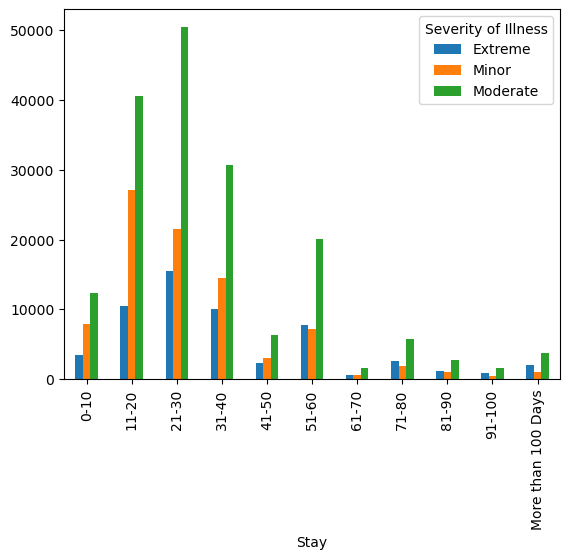

In [36]:
stayVSseverity.plot(kind='bar')

Severity of illness is dominated by 'moderate' for all stay durations, which is followed by minor severity. Extreme severity cases are often the minority for all stay durations, except for the longer durations. 

8. Age V/s Stay

In [37]:
stayVSAge=pd.pivot_table(df[['Age', 'Stay']], index='Age', columns='Stay', aggfunc=len).transpose()
stayVSAge

Age,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100
Stay,,,,,,,,,,
0-10,615,1552,3467,4916,4727,3427,2194,2201,422,83
11-20,1959,5343,11272,15792,14959,11346,7870,7958,1392,248
21-30,1489,4312,11394,18550,17906,13058,9033,9534,1920,295
31-40,1014,2681,6912,10912,10983,8569,5930,6420,1504,234
41-50,187,510,1398,2373,2507,1735,1205,1383,379,66
51-60,582,1429,3793,6517,7189,5739,4081,4433,1082,173
61-70,26,89,263,509,562,448,325,378,115,29
71-80,153,350,1026,1807,2146,1710,1230,1367,402,63
81-90,84,223,546,801,885,784,600,670,216,29


Text(0, 0.5, 'Number of patients who stayed for any given duration of days')

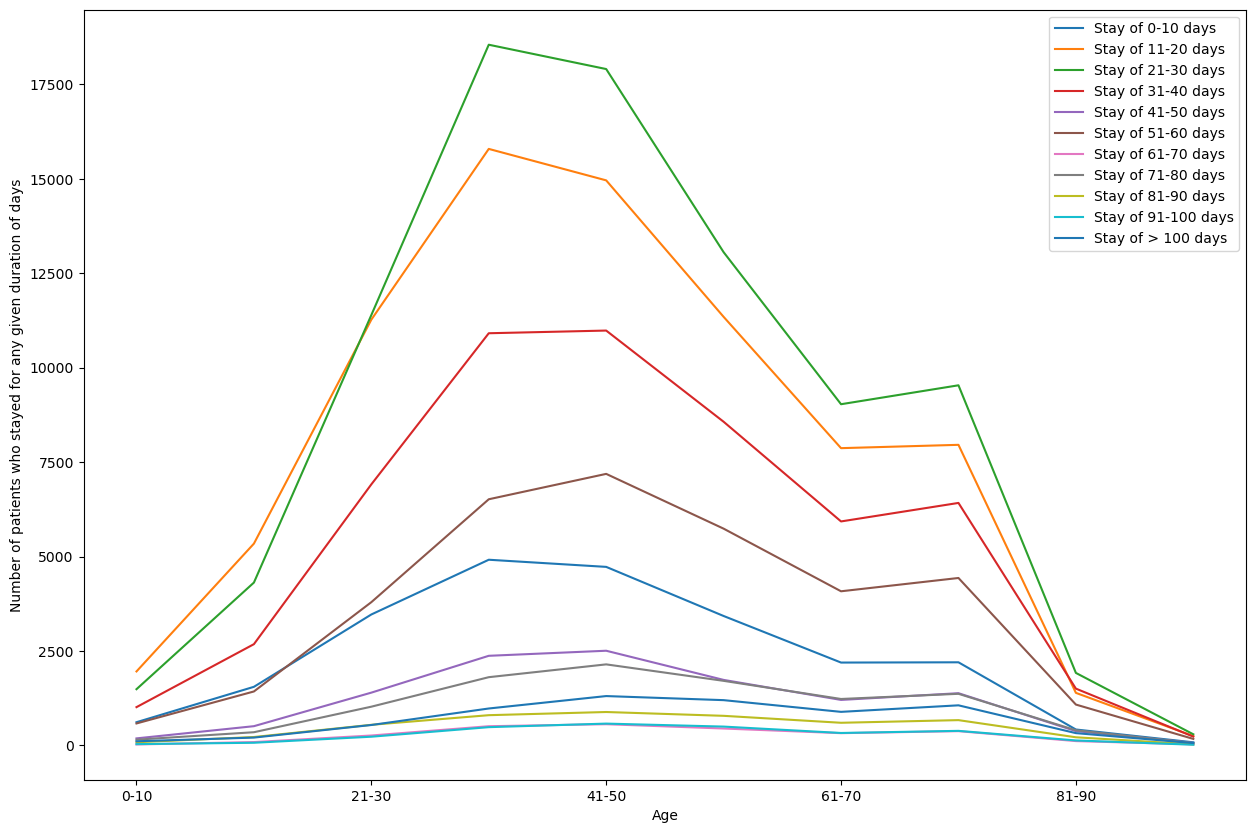

In [38]:
plt.figure(figsize=(15, 10))
for i in range(11):
    stayVSAge.iloc[i].plot()
L=plt.legend()
L.get_texts()[0].set_text('Stay of 0-10 days')
L.get_texts()[1].set_text('Stay of 11-20 days')
L.get_texts()[2].set_text('Stay of 21-30 days')
L.get_texts()[3].set_text('Stay of 31-40 days')
L.get_texts()[4].set_text('Stay of 41-50 days')
L.get_texts()[5].set_text('Stay of 51-60 days')
L.get_texts()[6].set_text('Stay of 61-70 days')
L.get_texts()[7].set_text('Stay of 71-80 days')
L.get_texts()[8].set_text('Stay of 81-90 days')
L.get_texts()[9].set_text('Stay of 91-100 days')
L.get_texts()[10].set_text('Stay of > 100 days')
plt.ylabel('Number of patients who stayed for any given duration of days')

Looking at the graph we can say that as the age increases, the  number of cases for any duration of stay increase until we reach the age group of 41-50 beyond which the number of cases for any duration of stay start to sharply decreases with a little spike around the age groups of 70 and 80.

**WE CAN NOW MOVE ONTO THE NUMERICAL FEATURES**

1. Available Extra Rooms in Hospital

In [39]:
stayVSAvlRooms=pd.pivot_table(df[['Available Extra Rooms in Hospital', 'Stay']], index='Available Extra Rooms in Hospital', columns='Stay', aggfunc=len).transpose()
stayVSAvlRooms

Available Extra Rooms in Hospital,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,20,21,24
Stay,,,,,,,,,,,,,,,,,,
0-10,NaN,429.0,6795.0,6484.0,7310.0,1571.0,648.0,275.0,74.0,13.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
11-20,NaN,963.0,23199.0,21671.0,23824.0,5193.0,2146.0,808.0,254.0,62.0,14.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN
21-30,11.0,856.0,22400.0,24769.0,29575.0,5846.0,2500.0,1039.0,391.0,73.0,19.0,5.0,5.0,1.0,1.0,NaN,NaN,NaN
31-40,NaN,1065.0,17669.0,16613.0,14949.0,3113.0,1166.0,371.0,154.0,37.0,15.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN
41-50,2.0,240.0,3121.0,3125.0,3887.0,795.0,362.0,129.0,66.0,10.0,3.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN
51-60,1.0,946.0,13903.0,10816.0,7032.0,1571.0,552.0,142.0,41.0,7.0,4.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN
61-70,NaN,94.0,845.0,759.0,740.0,188.0,81.0,23.0,11.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71-80,NaN,340.0,4159.0,3161.0,1943.0,450.0,146.0,36.0,10.0,6.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
81-90,NaN,191.0,1980.0,1507.0,858.0,199.0,73.0,18.0,8.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Number of patients who stayed for any given duration of days')

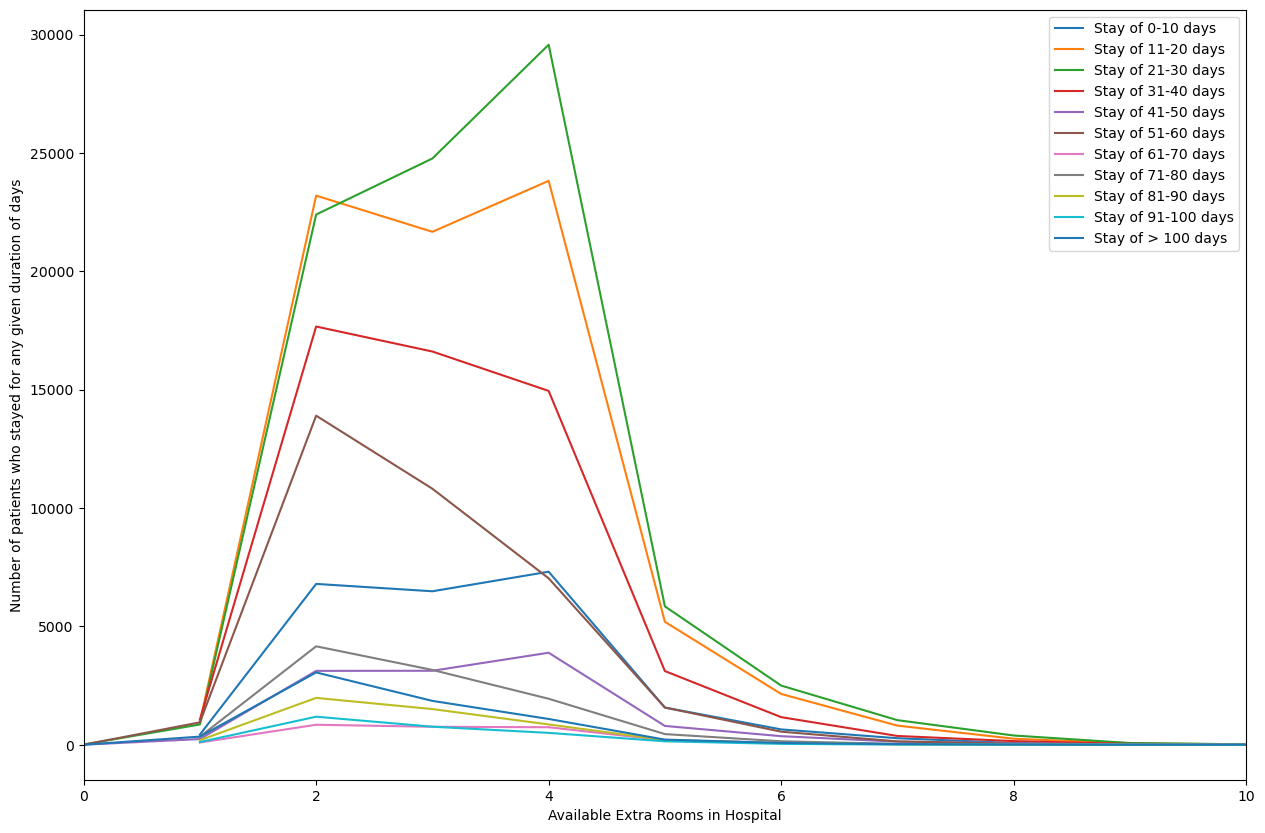

In [40]:
plt.figure(figsize=(15, 10))
for i in range(11):
    stayVSAvlRooms.iloc[i].plot()
plt.xlim(0, 10)
L=plt.legend()
L.get_texts()[0].set_text('Stay of 0-10 days')
L.get_texts()[1].set_text('Stay of 11-20 days')
L.get_texts()[2].set_text('Stay of 21-30 days')
L.get_texts()[3].set_text('Stay of 31-40 days')
L.get_texts()[4].set_text('Stay of 41-50 days')
L.get_texts()[5].set_text('Stay of 51-60 days')
L.get_texts()[6].set_text('Stay of 61-70 days')
L.get_texts()[7].set_text('Stay of 71-80 days')
L.get_texts()[8].set_text('Stay of 81-90 days')
L.get_texts()[9].set_text('Stay of 91-100 days')
L.get_texts()[10].set_text('Stay of > 100 days')
plt.ylabel('Number of patients who stayed for any given duration of days')

By looking at the graph, we can say that as the number of available extra rooms increase the number of cases for any stay durationn sharply rise and then sharply fall as we move beyond 3 or 4 available extra rooms. The number of cases approach nearly zero as we the number of available extra rooms exceed 8.

2. Bed Grade

In [41]:
stayVSBedgrade=pd.pivot_table(df[['Bed Grade', 'Stay']], index='Bed Grade', columns='Stay', aggfunc=len).transpose()
stayVSBedgrade

Bed Grade,1.0,2.0,3.0,4.0
Stay,,,,
0-10,2318,9293,7884,4107
11-20,5608,25550,31078,15884
21-30,7530,41615,25573,12736
31-40,4412,20123,20157,10445
41-50,1080,5114,3646,1895
51-60,3101,13697,11878,6329
61-70,275,1137,834,494
71-80,1006,3560,3637,2047
81-90,358,1240,2045,1194


<AxesSubplot:xlabel='Stay'>

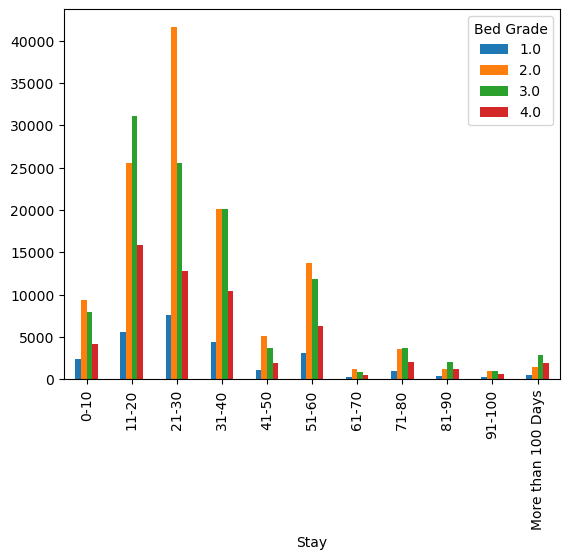

In [42]:
stayVSBedgrade.plot(kind='bar')

By looking at the graph what we can say is that there is a tough competition between the number of cases that were allotted beds with bed grade 2 and the number of cases that were allotted bed grades 3. What we can say for sure is that for any stay duration the number of patients that awarded a bed with bed grade 4 are strictly lesser than the number of patients who are allotted beds with bed grade 2 or 3. The number of patients with bed grade 1 are even lesser. 